# Similarity Scores Histograms

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
import util
from pprint import pformat

from models import GOOGLE_MODEL, VOYAGE_MODEL, OPENAI_MODEL, MISTRAL_MODEL, COHERE_MODEL

In [2]:
def get_emb_lists(folder: str, model: str, concept_id_list):

    df_path = "../../embedding-generation/data/" + folder + "/"
    udemy_courses_emb_df = pd.read_csv(df_path + "udemy_courses_{}.csv".format(model))
    roadmap_nodes_emb_df = pd.read_csv(df_path + "roadmap_nodes_{}.csv".format(model))
    roadmap_concepts_emb_df = roadmap_nodes_emb_df[roadmap_nodes_emb_df["id"].isin(concept_id_list)]
    # roadmap_concepts_emb_df = roadmap_nodes_emb_df[roadmap_nodes_emb_df["id"].isin(roadmap_concepts_df["id"])]

    udemy_courses_emb_df["emb"] = udemy_courses_emb_df.apply(util.convert_to_float, axis=1)
    course_emb_list = udemy_courses_emb_df["emb"].values
    course_emb_list = np.vstack(course_emb_list)

    roadmap_concepts_emb_df["emb"] = roadmap_concepts_emb_df.apply(util.convert_to_float, axis=1)
    concept_emb_list = roadmap_concepts_emb_df["emb"].values
    concept_emb_list = np.vstack(concept_emb_list)

    return course_emb_list, concept_emb_list

In [3]:
df_path = "../../embedding-generation/data/"
udemy_courses_df = pd.read_csv(df_path + "udemy_courses_final.csv")
roadmap_nodes_df = pd.read_csv(df_path + "roadmap_nodes_final.csv")
roadmap_concepts_df = roadmap_nodes_df[roadmap_nodes_df["type"] == "concept"].copy()
roadmap_concepts_df.reset_index(inplace=True)

roles = [
    "AI Data Scientist",
    "Android Developer",
    "Backend Developer",
    "Blockchain Developer",
    "Devops Engineer",
    "Frontend Developer",
    "Full Stack Developer",
    "Game Developer",
    "QA Engineer",
    "UX Designer",
]

roadmaps_dict = {"id": np.arange(1, len(roles) + 1), "name": roles}
roadmaps_df = pd.DataFrame.from_dict(roadmaps_dict)
roadmaps_df.set_index("id", inplace=True)

In [4]:
# Encoders/Decoders for Courses and Concepts
course_id_list = udemy_courses_df["id"]
encoder_for_courses = dict([(v, k) for v, k in zip(course_id_list, range(len(course_id_list)))])
decoder_for_courses = dict([(v, k) for k, v in encoder_for_courses.items()])

concept_id_list = roadmap_concepts_df["id"]
encoder_for_concepts = dict([(v, k) for v, k in zip(concept_id_list, range(len(concept_id_list)))])
decoder_for_concepts = dict([(v, k) for k, v in encoder_for_concepts.items()])

course_emb_list_google, concept_emb_list_google = get_emb_lists(folder="google_emb", model=GOOGLE_MODEL, concept_id_list=concept_id_list)
course_X_concept_google = cosine_similarity(course_emb_list_google, concept_emb_list_google)
concept_X_course_google = course_X_concept_google.transpose()

course_emb_list_voyage, concept_emb_list_voyage = get_emb_lists(folder="voyage_emb", model=VOYAGE_MODEL, concept_id_list=concept_id_list)
course_X_concept_voyage = cosine_similarity(course_emb_list_voyage, concept_emb_list_voyage)
concept_X_course_voyage = course_X_concept_voyage.transpose()

course_emb_list_openai, concept_emb_list_openai = get_emb_lists(folder="openai_emb", model=OPENAI_MODEL, concept_id_list=concept_id_list)
course_X_concept_openai = cosine_similarity(course_emb_list_openai, concept_emb_list_openai)
concept_X_course_openai = course_X_concept_openai.transpose()

course_emb_list_mistral, concept_emb_list_mistral = get_emb_lists(folder="mistral_emb", model=MISTRAL_MODEL, concept_id_list=concept_id_list)
course_X_concept_mistral = cosine_similarity(course_emb_list_mistral, concept_emb_list_mistral)
concept_X_course_mistral = course_X_concept_mistral.transpose()

course_emb_list_cohere, concept_emb_list_cohere = get_emb_lists(folder="cohere_emb", model=COHERE_MODEL, concept_id_list=concept_id_list)
course_X_concept_cohere = cosine_similarity(course_emb_list_cohere, concept_emb_list_cohere)
concept_X_course_cohere = course_X_concept_cohere.transpose()

similarity_matrices = [course_X_concept_google, course_X_concept_voyage, course_X_concept_openai, course_X_concept_mistral, course_X_concept_cohere] 


C:\Users\hp\AppData\Local\Temp\ipykernel_16524\3438718892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roadmap_concepts_emb_df["emb"] = roadmap_concepts_emb_df.apply(util.convert_to_float, axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_16524\3438718892.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roadmap_concepts_emb_df["emb"] = roadmap_concepts_emb_df.apply(util.convert_to_float, axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_16524\3438718892.py:13: SettingWithCopyWarning: 
A value is t

In [5]:
sc_google = course_X_concept_google.flatten()
sc_voyage = course_X_concept_voyage.flatten()
sc_openai = course_X_concept_openai.flatten()
sc_mistral = course_X_concept_mistral.flatten()
sc_cohere = course_X_concept_cohere.flatten()

In [9]:
def histogram(sc1, sc2, sc3, sc4, sc5):
    # Plot histograms
    plt.figure(figsize=(14, 6))
    plt.hist(sc1, bins=30, alpha=0.5, label='Model 1')
    plt.hist(sc2, bins=30, alpha=0.5, label='Model 2')
    plt.hist(sc3, bins=30, alpha=0.5, label='Model 3')
    plt.hist(sc4, bins=30, alpha=0.5, label='Model 4')
    plt.hist(sc5, bins=30, alpha=0.5, label='Model 5')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Similarity Scores')
    plt.legend()
    plt.show()

def kde(sc1, sc2, sc3, sc4, sc5):
    plt.figure(figsize=(14, 8))
    sns.kdeplot(sc1, label='Google: text-embedding-004', fill=True)
    sns.kdeplot(sc2, label='VoyageAI: voyage-large-2', fill=True)
    sns.kdeplot(sc3, label='OpenAI: text-embedding-3-large', fill=True)
    sns.kdeplot(sc4, label='MistralAI: mistral-embed', fill=True)
    sns.kdeplot(sc5, label='Cohere: embed-english-v3.0 ', fill=True)
    plt.xlabel('Similarity Score Values')
    plt.ylabel('Density')
    # plt.title('KDE of Similarity Scores')
    plt.legend(loc='upper left')
    plt.show()

def violin(sc1, sc2, sc3, sc4, sc5):
    plt.figure(figsize=(14, 6))
    sns.violinplot(data=[sc1, sc2, sc3, sc4, sc5])
    plt.xticks([0, 1, 2, 3, 4], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])
    plt.xlabel('Model')
    plt.ylabel('Similarity Score')
    plt.title('Violin Plot of Similarity Scores')
    plt.show()

def plot_cdf(data, label):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.plot(sorted_data, yvals, label=label)

def cdf(sc1, sc2, sc3, sc4, sc5):
    plt.figure(figsize=(14, 6))
    plot_cdf(sc1, 'Model 1')
    plot_cdf(sc2, 'Model 2')
    plot_cdf(sc3, 'Model 3')
    plot_cdf(sc4, 'Model 4')
    plot_cdf(sc5, 'Model 5')
    plt.xlabel('Similarity Score')
    plt.ylabel('Cumulative Probability')
    plt.title('CDF of Similarity Scores')
    plt.legend()
    plt.show()

def find_kde_peak(similarity_scores):
    # Fit the KDE
    kde = sns.kdeplot(similarity_scores, bw_adjust=0.5).get_lines()[0].get_data()
    plt.close()  # Close the plot created by sns.kdeplot

    x = kde[0]  # x values
    y = kde[1]  # y values

    # Find the peak of the KDE
    peak_index = np.argmax(y)
    peak_x = x[peak_index]
    peak_y = y[peak_index]

    return peak_x, peak_y

def kde_peak_graph(similarity_matrices: list[np.array]):
    # Flatten the similarity matrices and find the peaks
    peaks = []
    for i, similarity_matrix in enumerate(similarity_matrices):
        similarity_scores = similarity_matrix.flatten()
        peak_x, peak_y = find_kde_peak(similarity_scores)
        peaks.append((peak_x, peak_y))
        print(f"Model {i+1} Peak: x = {peak_x}, y = {peak_y}")

    # Example plot to visualize KDE and peak
    plt.figure(figsize=(14, 6))
    for i, similarity_matrix in enumerate(similarity_matrices):
        similarity_scores = similarity_matrix.flatten()
        sns.kdeplot(similarity_scores, bw_adjust=0.5, label=f'Model {i+1}')
        peak_x, peak_y = peaks[i]
        plt.scatter(peak_x, peak_y, s=100, label=f'Peak Model {i+1}', zorder=5)
        plt.text(peak_x, peak_y, f'{peak_x:.2f}', fontsize=12, ha='right')


    plt.xlabel('Similarity Score')
    plt.ylabel('Density')
    plt.title('KDE of Similarity Scores with Peaks')
    plt.legend()
    plt.show()


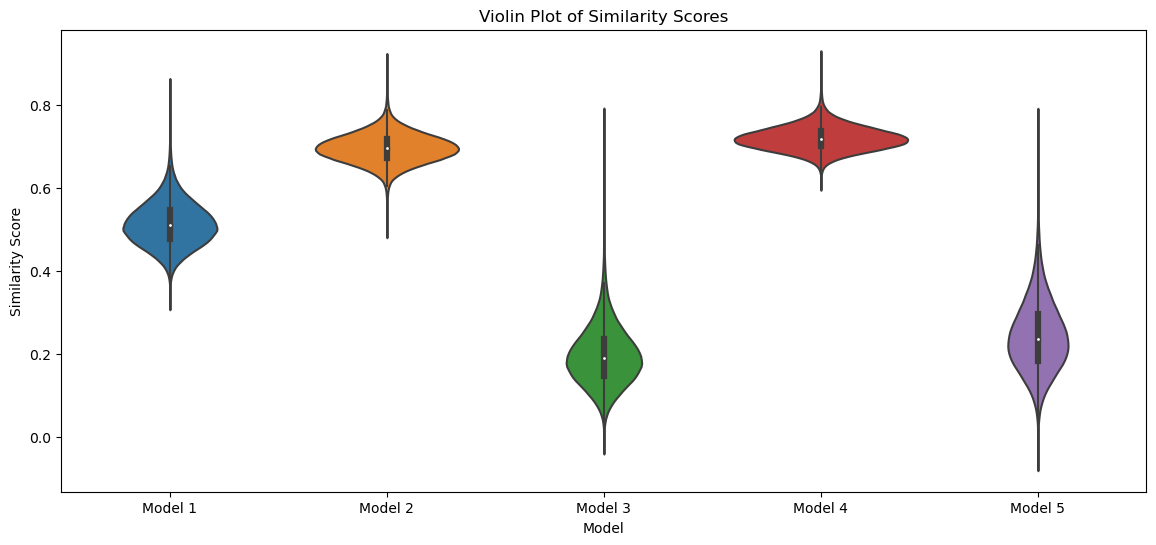

In [11]:
violin(sc_google, sc_voyage, sc_openai, sc_mistral, sc_cohere)

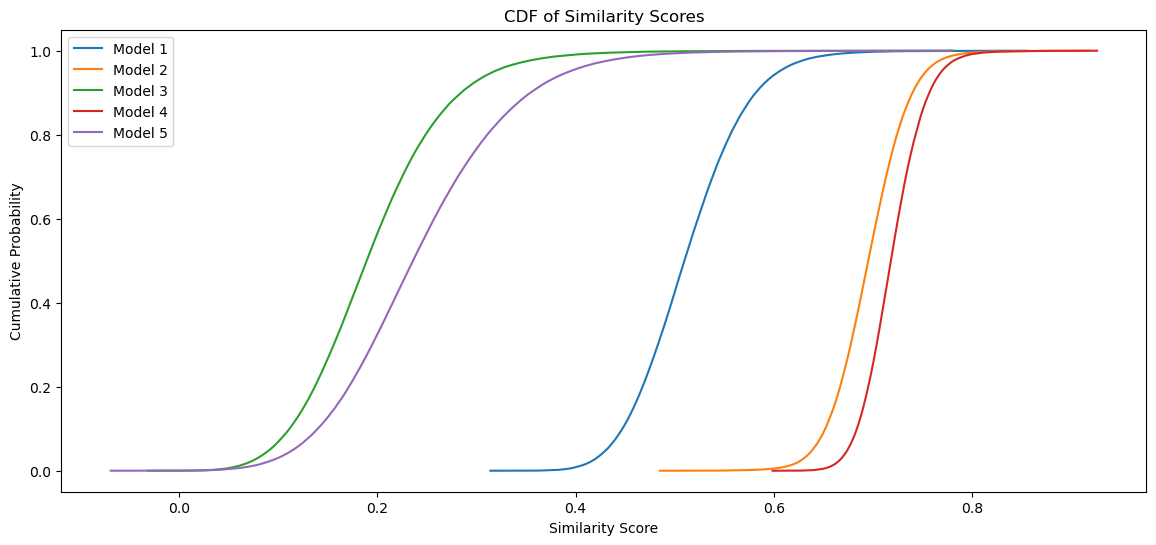

In [12]:
cdf(sc_google, sc_voyage, sc_openai, sc_mistral, sc_cohere)

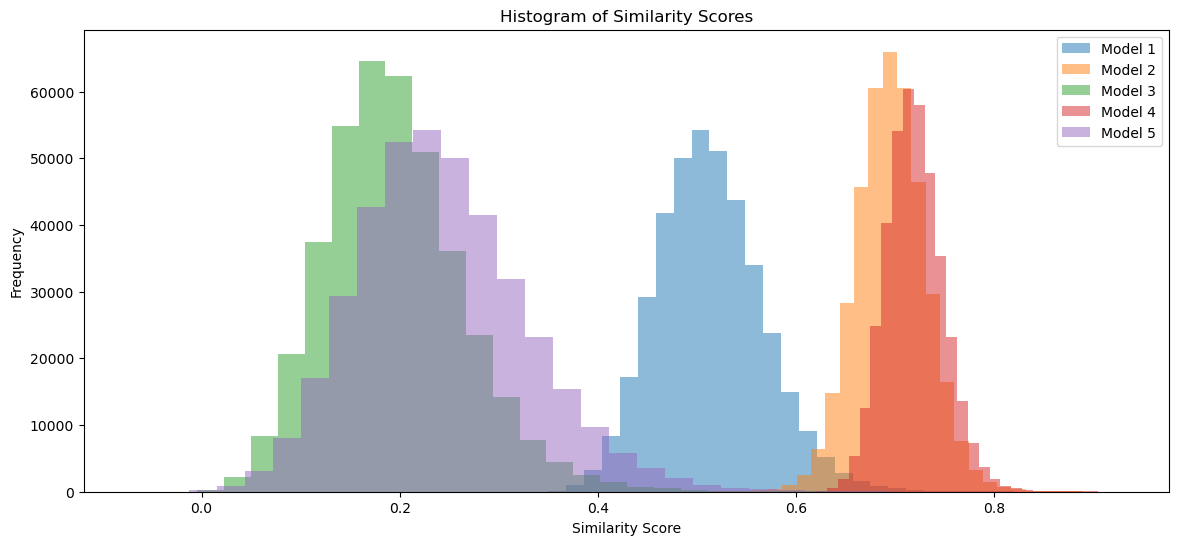

In [9]:
histogram(sc_google, sc_voyage, sc_openai, sc_mistral, sc_cohere)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

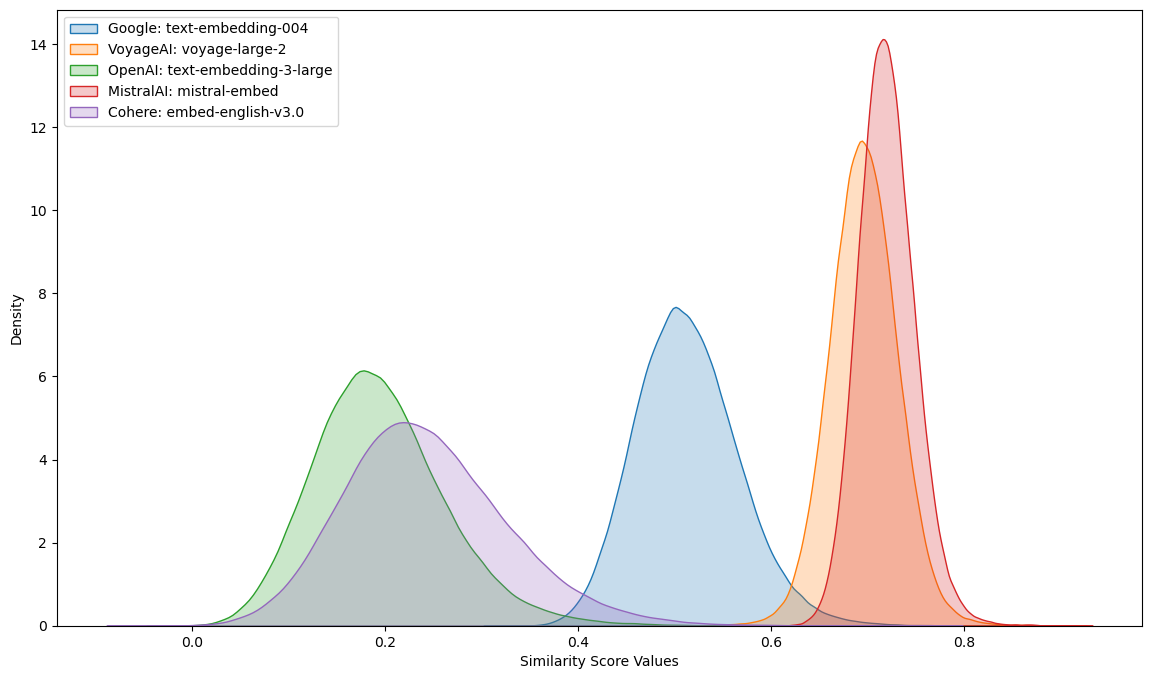

In [10]:
kde(sc_google, sc_voyage, sc_openai, sc_mistral, sc_cohere)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Model 1 Peak: x = 0.49998636441590394, y = 7.745989652738964


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Model 2 Peak: x = 0.694125261762492, y = 11.73097858055471


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Model 3 Peak: x = 0.17734962911589744, y = 6.175520250522121


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Model 4 Peak: x = 0.7163738466412681, y = 14.173944593826521


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Model 5 Peak: x = 0.21750917901307282, y = 4.921637308558205


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

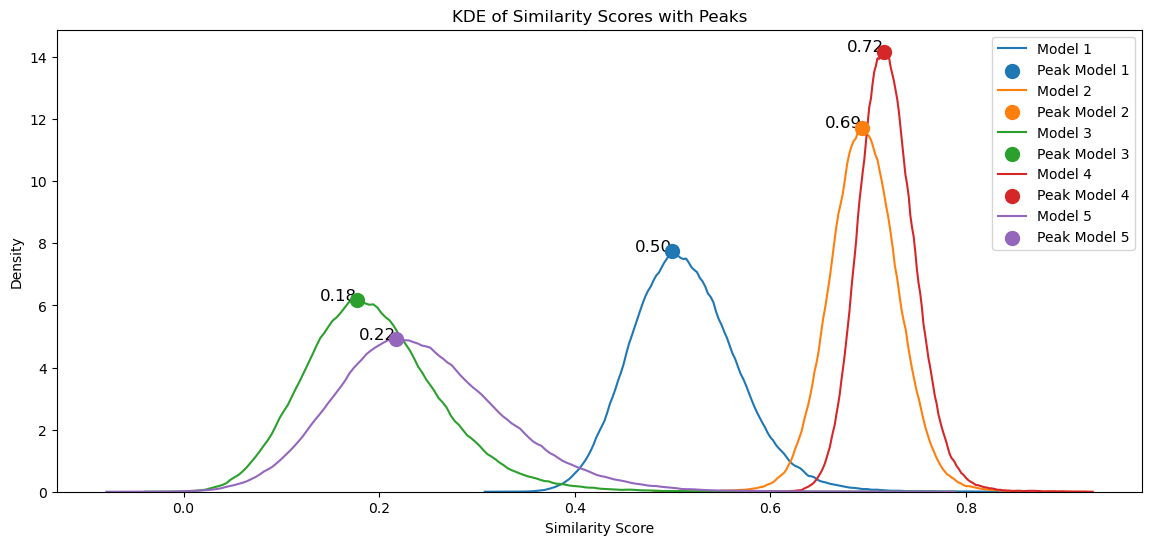

In [15]:
kde_peak_graph(similarity_matrices)

In [7]:
models_dict = {"Google": GOOGLE_MODEL, "Voyage": VOYAGE_MODEL, "OpenAI": OPENAI_MODEL, "Mistral": MISTRAL_MODEL, "Cohere": COHERE_MODEL}

emb_thre_2sigma = [util.calculate_threshold(sim_mat=matrix, sigma_num=2) for matrix in similarity_matrices]
emb_thre_2sigma_dict = dict(zip(models_dict.values(), emb_thre_2sigma))

emb_thre_3sigma = [util.calculate_threshold(sim_mat=matrix, sigma_num=3)  for matrix in similarity_matrices]
emb_thre_3sigma_dict = dict(zip(models_dict.values(), emb_thre_3sigma))

# print('Embedding thresholds as Mean + Two Sigma: \n {}'.format(emb_thre_2sigma_dict))

print("Their corresponding mean: \n" + pformat(list(zip(models_dict.keys(), [util.calculate_mean(sim_mat=matrix)  for matrix in similarity_matrices]))))

print("Their corresponding sigma: \n" + pformat(list(zip(models_dict.keys(), [util.calculate_sigma(sim_mat=matrix)  for matrix in similarity_matrices]))))


print('Mean + Two Sigma:')
print("Their corresponding thresholds: \n" + pformat(list(zip(models_dict.keys(), emb_thre_2sigma))))


# print('Embedding thresholds as Mean + Three Sigma: \n {}'.format(emb_thre_3sigma_dict))
print('Mean + Three Sigma:')
print("Their corresponding thresholds: \n" + pformat(list(zip(models_dict.keys(), emb_thre_3sigma))))

Their corresponding mean: 
[('Google', 0.5130106488829314),
 ('Voyage', 0.6958113416291182),
 ('OpenAI', 0.19493829312514538),
 ('Mistral', 0.7197077723485258),
 ('Cohere', 0.24285266540956682)]
Their corresponding sigma: 
[('Google', 0.0536393484363211),
 ('Voyage', 0.035587205612890624),
 ('OpenAI', 0.07033640159766727),
 ('Mistral', 0.029319154832511428),
 ('Cohere', 0.08566238934567298)]
Mean + Two Sigma:
Their corresponding thresholds: 
[('Google', 0.6202893457555736),
 ('Voyage', 0.7669857528548994),
 ('OpenAI', 0.3356110963204799),
 ('Mistral', 0.7783460820135486),
 ('Cohere', 0.4141774441009128)]
Mean + Three Sigma:
Their corresponding thresholds: 
[('Google', 0.6739286941918947),
 ('Voyage', 0.8025729584677901),
 ('OpenAI', 0.4059474979181472),
 ('Mistral', 0.8076652368460601),
 ('Cohere', 0.4998398334465858)]
